In [ ]:
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt


mag_flux = np.genfromtxt('PSP_FLD_L2_MAG_RTN_1MIN_145910.txt', skip_header=59, skip_footer=3) #import magnetic flux values
density = np.genfromtxt('PSP_SWP_SPC_L3I_72861.txt', skip_header=75, skip_footer=3) #import proton number density values
velocity = np.genfromtxt('PSP_SWP_SPC_L3I_209776.txt', skip_header=76, skip_footer=3) #import bulk proton velocity values
distance = np.genfromtxt('PSP_SWP_SPI_SF0A_L3_MOM_167546.txt', skip_header=44) #import spaceship solar distance data


In [4]:
#Ensure all data is in arrays
A = np.array(mag_flux)
B = np.array(density)
C = np.array(velocity)
D = np.array(distance)


#Remove index[0] which only contains the year (2018)
A_2 = A[:,1:]
B_2 = B[:,1:]
C_2 = C[:,1:]
D_2 = D[:,1:]


#Convert time values to days
A_time_int1 = (1 / 24) * (1 / 60) * (1 / 60) * A_2[:,0]
B_time_int1 = (1 / 24) * (1 / 60) * (1 / 60) * B_2[:,0]
C_time_int1 = (1 / 24) * (1 / 60) * (1 / 60) * C_2[:,0]
D_time_int1 = (1 / 24) * (1 / 60) * (1 / 60) * D_2[:,0]


#Remove number of whole days, as we are looking at only a 10 hour period
A_time_int2 = A_time_int1 - 323
B_time_int2 = B_time_int1 - 323
C_time_int2 = C_time_int1 - 323
D_time_int2 = D_time_int1 - 323



#Convert days to hours
A_h = A_time_int2 * 24 
B_h = B_time_int2 * 24
C_h = C_time_int2 * 24
D_h = D_time_int2 * 24


#Reassemble variable matrices with time in hours in the first index
A_fix = np.column_stack([A_h, A_2[:,1:]]) 
B_fix = np.column_stack([B_h, B_2[:,1]])
C_fix = np.column_stack([C_h, C_2[:,1:]])
D_fix = np.column_stack([D_h, D_2[:,1:]])


In [37]:
y3_1 = C_fix[:,1] #Radial velocity

# Values for interpolation
B_values = B_fix[:, 1]  #Interpolate values in 2nd col

# Indices for interpolation
a = np.linspace(0, len(B_values) - 1, len(A))

# Linear interpolation
B_rs = np.interp(a, np.arange(len(B_values)), B_values)

m_p = (1.67 * 10**-27) # proton mass in kg
N = (A_fix[:,1] * 10**-9)/ (10**3 * np.sqrt(1.25663e-6 * 10**6 * m_p * B_rs)) #convert nT to T (numerator) and cm^-3 to m^-3 then km (denominator)

#convert km to AU
dist_AU = D_fix[:,1] * (6.68459e-9)

T = (m_p * y3_1**2)/(1.380e-23) #Convert proton bulk velocity to temperature
C_s = np.sqrt(((5/3) * 1.380e-23 * T)/ m_p) #Determine the speed of sound
b = np.linspace(0, len(C_s) - 1, len(A))
C_rs = np.interp(b, np.arange(len(C_s)), C_s)

D_values = dist_AU
d = np.linspace(0, len(D_values) - 1, len(A))
D_rs = np.interp(d, np.arange(len(D_values)), D_values)

C:\Users\jowar\AppData\Local\Temp\ipykernel_27292\2887270851.py:13: RuntimeWarning: invalid value encountered in sqrt
  N = (A_fix[:,1] * 10**-9)/ (10**3 * np.sqrt(1.25663e-6 * 10**6 * m_p * B_rs)) #convert nT to T (numerator) and cm^-3 to m^-3 then km (denominator)


In [27]:
x1 = A_fix[:,0] #Magnetic flux time values
y1_1 = A_fix[:,1] #B_R
y1_2 = A_fix[:,2] #B_T
y1_3 = A_fix[:,3] #B_N

x2 = B_fix[:,0] #Number density time values
y2 = B_fix[:,1] #Number density

x3 = C_fix[:,0] #Bulk velocity times
y3_1 = C_fix[:,1] #Radial velocity
y3_2 = C_fix[:,2] #Tangential velocity

x4 = x1
y4 = np.abs(N)

x5 = x1
y5 =( C_rs / y4)**2

x6 = x1 #Spacecraft times
y6 = D_rs #Distance from barycenter in AU

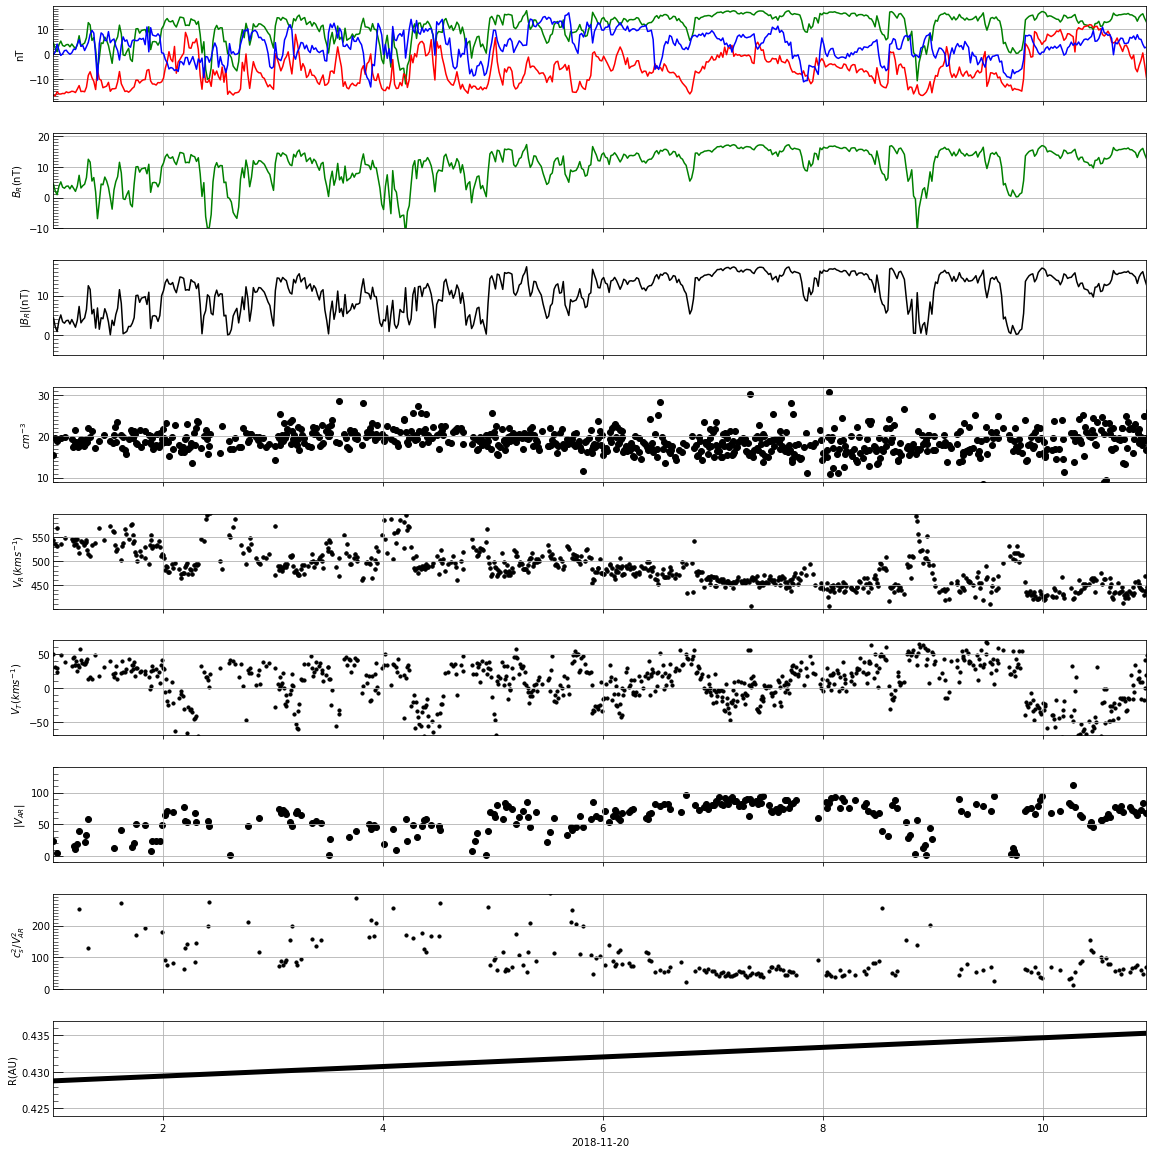

In [34]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=9, figsize=(16, 16)) #Plot all plots in one figure
fig.tight_layout() #Ensure appropriate spacing between subplots,labels, etc.

#Plot time series of Magenetic flux density in RTN coordinates
ax0.plot(x1, y1_1, color='g')
ax0.plot(x1, y1_2, color='r')
ax0.plot(x1, y1_3, color='b')
ax0.set_ylabel('nT')
ax0.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
major_ticks = np.arange(-10, 20, 10)
minor_ticks = np.arange(-19, 19, 1)
ax0.set_yticks(major_ticks)
ax0.set_yticks(minor_ticks, minor=True)
ax0.tick_params(axis='y', which='major', direction='in',length=10)
ax0.tick_params(axis='y', which='minor', direction='in',length=5)
ax0.set_xticklabels([])

#Magnetic flux in the radial direction
ax1.plot(x1, y1_1, color='g')
ax1.set_ylabel("$B_{R}$(nT)")
ax1.set_ylim([-10, 21])
ax1.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
major_ticks = np.arange(-10, 21, 10)
minor_ticks = np.arange(-10, 21, 1)
ax1.set_yticks(major_ticks)
ax1.set_yticks(minor_ticks, minor=True)
ax1.tick_params(axis='y', which='major', direction='in',length=10)
ax1.tick_params(axis='y', which='minor', direction='in',length=5)
ax1.set_xticklabels([])

#Absolute value of radial magnetic flux (magnitude is directionally invariant)
ax2.plot(x1, abs(y1_1), color='k')
ax2.set_ylabel("$|B_{R}|$(nT)")
ax2.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
major_ticks = np.arange(0, 20, 10)
minor_ticks = np.arange(-5, 20, 1)
ax2.set_yticks(major_ticks)
ax2.set_yticks(minor_ticks, minor=True)
ax2.tick_params(axis='y', which='major', direction='in',length=10)
ax2.tick_params(axis='y', which='minor', direction='in',length=5)
ax2.set_xticklabels([])

#Bulk proton number density
ax3.scatter(x2, y2, color='k')
ax3.set_ylabel("$cm^{-3}$")
ax3.set_ylim([9,32])
ax3.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
major_ticks = np.arange(10, 32, 10)
minor_ticks = np.arange(9, 32, 1)
ax3.set_yticks(major_ticks)
ax3.set_yticks(minor_ticks, minor=True)
ax3.tick_params(axis='y', which='major', direction='in',length=10)
ax3.tick_params(axis='y', which='minor', direction='in',length=5)
ax3.set_xticklabels([])

#Radial velocity of charged particles (solar wind)
ax4.scatter(x3, y3_1, color='k',s=12)
ax4.set_ylabel("$V_{R}(kms^{-1})$")
ax4.set_ylim([400, 600])
ax4.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
major_ticks = np.arange(450, 600, 50)
minor_ticks = np.arange(400, 600, 10)
ax4.set_yticks(major_ticks)
ax4.set_yticks(minor_ticks, minor=True)
ax4.tick_params(axis='y', which='major', direction='in',length=10)
ax4.tick_params(axis='y', which='minor', direction='in',length=5)
ax4.set_xticklabels([])

#Tangential velocity of charged particles (solar wind)
ax5.scatter(x3, y3_2, color='k', s=10)
ax5.set_ylabel("$V_{T}(kms^{-1})$")
ax5.set_ylim([-70, 70])
ax5.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
major_ticks = np.arange(-50, 70, 50)
minor_ticks = np.arange(-70, 70, 10)
ax5.set_yticks(major_ticks)
ax5.set_yticks(minor_ticks, minor=True)
ax5.tick_params(axis='y', which='major', direction='in',length=10)
ax5.tick_params(axis='y', which='minor', direction='in',length=5)
ax5.set_xticklabels([])

#Absolute value of radial Alfvenic wave velocity
ax6.scatter(x4, y4, color='k')
ax6.set_ylabel("$|V_{AR}|$")
ax6.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
major_ticks = np.arange(0, 150, 50)
minor_ticks = np.arange(-10, 150, 10)
ax6.set_yticks(major_ticks)
ax6.set_yticks(minor_ticks, minor=True)
ax6.tick_params(axis='y', which='major', direction='in',length=10)
ax6.tick_params(axis='y', which='minor', direction='in',length=5)
ax6.set_xticklabels([])

#The ratio of the speed of sound in the plasma to Alfvenic wave speed, squared to guarantee positive values
ax7.scatter(x5, y5, color='k', s=10)
ax7.set_ylabel('$c_{s}^{2}/V_{AR}^{2}$')
ax7.set_ylim([0, 300])
ax7.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
#ax7.set_yscale('log')
major_ticks = np.arange(0, 300, 100)
minor_ticks = np.arange(0, 300, 10)
ax7.set_yticks(major_ticks)
ax7.set_yticks(minor_ticks, minor=True)
ax7.tick_params(axis='y', which='major', direction='in',length=10)
ax7.tick_params(axis='y', which='minor', direction='in',length=5)
ax7.set_xticklabels([])

#Distance from spacecraft to barycenter.

ax8.plot(x6, y6, color='k', linewidth=5)
ax8.set_ylabel('R(AU)')
ax8.set_xlabel('2018-11-20')
ax8.set_xlim([min(A_fix[:,0]), max(A_fix[:,0])])
ax8.set_ylim([0.424, 0.437])
major_ticks = np.arange(0.425, 0.435, 0.005)
minor_ticks = np.arange(0.425, 0.436, 0.001)
ax8.set_yticks(major_ticks)
ax8.set_yticks(minor_ticks, minor=True)
ax8.tick_params(axis='y', which='major', direction='in',length=10)
ax8.tick_params(axis='y', which='minor', direction='in',length=5)



ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()


plt.show()